In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import sncosmo
import tdaspop
import snpop

In [4]:
from snpop import SimpleSALTPopulation, GMM_SALTPopulation

In [5]:
from collections import OrderedDict

In [6]:
print(sncosmo.__version__)
print(tdaspop.__version__)
print(snpop.__version__)
print(snpop.__file__)

1.7.1
0.1.6
0.1.6dev2
/Users/rbiswas/src/SNPop/snpop/__init__.py


# GMM SALT Distributions

The SALT model used for SNIa has the following parameters for each SNIa :
```x0, x1, c, z, t0 ```. `t0` is the time of the peak in B band, and this is expected to be uniformly distributed in time. The remaining parameters are from a population distribution, which was trained on the SNLS data by David Rubin. The result is parametrized in terms of a distribution of ```x1, c, mBB``` where `mBB` is an auxillary parameter, related to `mB` the `BessellB` band peak magnitude by a `H0=70` cosmology distance. The model here adds an intrinsic dispersion in the luminosity.

As, with `SimpleSALTPopulation`, there are two ways to use `GMM_SALTPopulation`:
1. Use it with a supplied sample of SN redshifts.
2. Supply it with the area of the sky, the duration of the survey, and the redshift bounds, and it will use a powerlaw rate for SN to obtain a redshift sample, and run through with the previous case. 

To start with we describe the first case

### `GMM_SALTPopulation`

obtain a set of samples for the redshift

In [7]:
zSamples = np.random.uniform(0, 1.0, size=10)
print(zSamples)

[0.75829026 0.33989072 0.58997673 0.00099661 0.66107825 0.59012635
 0.981699   0.27328391 0.77093857 0.31076129]


Instantiate the object

In [8]:
gp = GMM_SALTPopulation(zSamples, rng=np.random.RandomState(1))

In [9]:
gp.idxvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
all(gp.zSamples == zSamples)

True

In [11]:
gp.cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

In [12]:
gp.paramsTable

,x0,mB,x1,c,mBB,MnoDisp,Mabs,t0,z,model
idx,,,,,,,,,,
0,0.000003,24.472506,1.058928,0.007946,24.210784,-19.210698,-18.948976,61102.130317,0.758290,SALT2
1,0.000010,22.971869,-0.309536,0.248835,23.086050,-18.250181,-18.364362,62209.184401,0.339891,SALT2
2,0.000004,24.048984,-0.591849,0.078846,24.001129,-18.756967,-18.709111,59580.417468,0.589977,SALT2
3,4.754395,8.808869,0.276344,-0.077539,8.846274,-19.377881,-19.415287,60683.513890,0.000997,SALT2
4,0.000003,24.193546,-0.450145,0.009225,23.974229,-19.083635,-18.864319,60115.659001,0.661078,SALT2
5,0.000007,23.380180,0.969742,0.074249,23.689201,-19.069560,-19.378581,59917.035871,0.590126,SALT2
6,0.000002,24.674391,1.039336,-0.048066,24.722753,-19.387739,-19.436102,60259.849772,0.981699,SALT2
7,0.000025,22.013980,-2.194071,0.048549,22.071588,-18.718499,-18.776107,60841.296654,0.273284,SALT2
8,0.000004,24.091267,0.205920,-0.106301,23.921201,-19.544263,-19.374197,61028.201281,0.770939,SALT2


In [13]:
gp.modelParams(3)

OrderedDict([('x0', 4.754395304663533),
             ('mB', 8.808868933178811),
             ('x1', 0.2763443128324382),
             ('c', -0.07753922802104068),
             ('mBB', 8.846274489500423),
             ('MnoDisp', -19.37788130259044),
             ('Mabs', -19.41528685891205),
             ('t0', 60683.51389010622),
             ('z', 0.0009966057448627108),
             ('model', 'SALT2')])

### 2. Generate From the skyArea, redshift bounds and survey Duration

This uses the `fromSkyArea` method

In general, we will not have a redshift distribution or a redshift sample to use. In this case, we prefer to use 
the `fromSkyArea` method which instead obtains these samples from using the fieldArea, zmin and zmax. Right now, we also need `numzBins` because of the binned implementation which we will later get rid of.

In [14]:
gpz = GMM_SALTPopulation.fromSkyArea(rng=np.random.RandomState(1), fieldArea=0.5)

In [15]:
gpz.zSamples.size

1351

In [16]:
gpz.numSources

1351

In [17]:
gpz.paramsTable.head()

,x0,mB,x1,c,mBB,MnoDisp,Mabs,t0,z,model
idx,,,,,,,,,,
0,0.000164,19.962387,-0.442255,-0.004058,19.850736,-19.127415,-19.015764,62394.169557,0.128958,SALT2
1,0.000042,21.440730,1.232871,0.111331,21.272264,-18.986671,-18.818205,60783.533039,0.220232,SALT2
2,0.000066,20.953837,0.297145,-0.006085,20.819483,-19.235236,-19.100882,62487.438845,0.202496,SALT2
3,0.000144,20.104681,-0.817684,-0.086030,20.266484,-19.339013,-19.500815,60764.929876,0.168033,SALT2
4,0.000027,21.931654,0.202489,0.072395,21.872978,-18.970405,-18.911729,60703.770920,0.279210,SALT2


## Characterizations of the Distribution

## Form of the internal dispersion

In [18]:
import scipy

/Users/rbiswas/soft/mypython3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


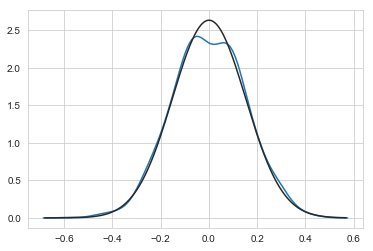

In [19]:
fig, ax = plt.subplots()
sns.distplot(gpz.paramsTable.Mabs - gpz.paramsTable.MnoDisp, hist=False, fit=scipy.stats.norm)

## Checks on the Hubble Diagram

In [20]:
from astropy.cosmology import Planck15

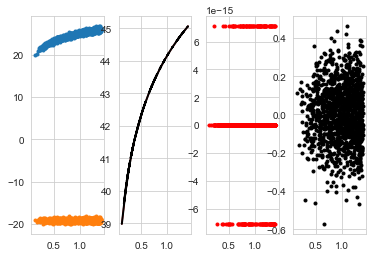

In [21]:
fig, ax = plt.subplots(1, 4)
ax[0].plot(gpz.paramsTable.z, gpz.paramsTable.mB, '.')
ax[0].plot(gpz.paramsTable.z, gpz.paramsTable.Mabs, '.')
ax[1].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.Mabs, color='r')
ax[1].plot(gpz.paramsTable.z, Planck15.distmod(gpz.paramsTable.z).value, color='k', lw=2)
ax[2].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.Mabs - Planck15.distmod(gpz.paramsTable.z).value, 'r.')
ax[3].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.MnoDisp - Planck15.distmod(gpz.paramsTable.z).value, 'k.')

## Distribution of x1 and c

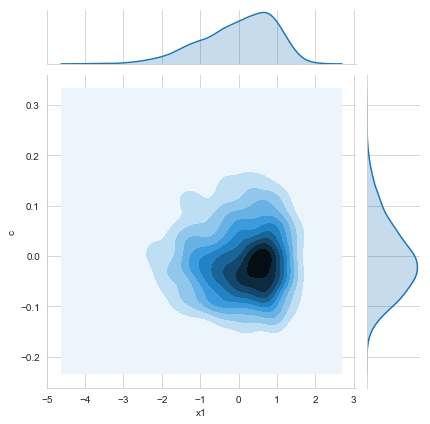

In [22]:
#fig = plt.figure(figsize=(6,6))
jp = sns.jointplot(data=gpz.paramsTable, x='x1', y='c', kind='kde')
jp.fig.set_figheight(6)
jp.fig.set_figwidth(6)

In [23]:
gpz.paramsTable.c.std()

0.07228172621836297

In [24]:
gpz.paramsTable.x1.std()

0.9466470033355492